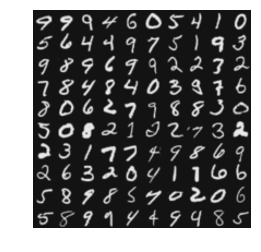

In [8]:
#load training sets from .mat file

#to import .mat file
import scipy.io as si
import numpy as np
from scipy.special import expit
import random #to generate random numbers
import matplotlib.pyplot as plt

#.mat file has two matrix X (5000*400) and y(5000*1)
File = si.loadmat('ex4data1.mat')

#plot data
#create array to store 100 images with 20*20 pixels of each image
display = np.zeros((200,200))

#select randomly 100 numbers
selected = random.sample(range(0,5000),100)

rows = 0
cols = 0

for data in selected:
    #create matrix of image from selected training data-sets
    #Transpose the data to get a straight image
    temp = np.array(File['X'][data]).reshape(20,20).T
    
    #check if the first row of display array is filled or not
    if cols == 10:
        cols = 0
        rows += 1
    
    #copy data of temp into display array
    display[rows*20:rows*20 + 20,cols*20:cols*20 + 20] = temp
    cols += 1

#plot display as images
plt.axis('off')
plt.imshow(display,cmap='gray',interpolation = 'gaussian')

In [4]:
#load parameters
all_theta =  si.loadmat('ex4weights.mat')
print(all_theta['Theta1'].shape,all_theta['Theta2'].shape)

#load input_layer
input_layer = np.array(File['X'])
input_layer = np.insert(input_layer,0,1,axis = 1)

(25, 401) (10, 26)


In [5]:
from scipy.special import expit #to calculate logit 


#sigmoid function implementation
def sigmoid_function(z):
          return expit(z)
    
#implement Forward Propagation
def compute_input_layer(theta1,input_layer):
    return (sigmoid_function(np.dot(input_layer,theta1.T)))

def compute_hidden_layer(theta2,A):
    return (sigmoid_function(np.dot(A,theta2.T)))

#return 5000*10 matrix
def compute_hypothesis(input_layer,all_theta):
    
    #get 5000*25 matrix
    A1 = compute_input_layer(all_theta['Theta1'],input_layer)
    
    #change A dim to 5000*26
    A1 = np.insert(A1,0,1,axis = 1)

    #get 5000*10 matrix
    A2 = compute_hidden_layer(all_theta['Theta2'],A1)
    return A2



In [6]:
#hypothesis for all tarining set
hypothesis = compute_hypothesis(input_layer,all_theta)
print(hypothesis[0].item(0))

0.00011266153022739022


In [10]:
#implement Cost function for Neural Nertwork with no Regularization


#calculate cost for a given training data and parameters
def Cost_function_n_reg(input_layer,all_theta,actual_result,K):
    
    #calculate hypothesis
    hypothesis1 = compute_hypothesis(input_layer,all_theta)

    term1 =  - np.sum(np.multiply(actual_result,np.log(hypothesis1))) 
    term2 =  - np.sum(np.multiply((1 -actual_result),np.log(1 - hypothesis1))) 
    cost = term1 + term2
            
    cost = (cost/(len(hypothesis1)))
    return cost

In [11]:
#create actual result of training set in form of {0,1}
def result_binary(actual_result,num_labels):
    y = np.zeros((len(actual_result),num_labels))
    for i in range(len(actual_result)):
        temp = actual_result[i]
        y[i][temp - 1] = 1
    return y

output_layer = result_binary(File['y'],10)

print(Cost_function_n_reg(input_layer,all_theta,output_layer,10))

0.287629165161


In [15]:
#implement Cost function for Neural Nertwork with  Regularization
def Cost_function_reg(input_layer,all_theta,actual_result,K,Lambda):
    
    #create theta1 and theta2
    theta1 = all_theta['Theta1']
    theta1 = np.delete(theta1,0,1)
    theta2 = all_theta['Theta2']
    theta2 = np.delete(theta2,0,1)
    
    #calculate hypothesis
    hypothesis1 = compute_hypothesis(input_layer,all_theta)
    
    cost = 0
    term1 =  - np.sum(np.multiply(actual_result,np.log(hypothesis1))) 
    term2 =  - np.sum(np.multiply((1 -actual_result),np.log(1 - hypothesis1))) 
    cost = term1 + term2
    
    cost = (cost/(len(hypothesis)))
    
    #calculate Regularizarion Term
    
    #minimize each theta presents in all_theta dictionary

    #regularize theta1
    t1 = np.sum(theta1*theta1) 
    
    #regularize theta2
    t2 = np.sum(theta2*theta2)
    
    Reg_term = (Lambda/(2*(len(hypothesis)))) * (t1 + t2)
   
    #update cost
    cost = cost + Reg_term
    return cost


In [16]:
print(Cost_function_reg(input_layer,all_theta,output_layer,10,1))


0.383769859091
